# v2.1 exploration trying to make it work better

In [1]:
# Environment
import os
import os.path as osp
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
# Local modules
sys.path.append('..')
import reproducibility
import pandas as pd
from utils import print_dict_summary
from data_funcs import rmse
from moisture_rnn import RNNParams, RNNData, RNN, RNN_LSTM, create_rnn_data2
from moisture_rnn_pkl import pkl2train
from tensorflow.keras.callbacks import Callback
from utils import hash2
import copy
import logging
import pickle
from utils import logging_setup, read_yml, read_pkl, hash_ndarray, hash_weights
import yaml
import copy

In [2]:
logging_setup()

## Tests

In [3]:
# data_file = 'data/fmda_nw_202401-05_f05.pkl'
# train = pkl2train([data_file])
# with open("train.pkl", 'wb') as file:
#     logging.info('Writing the rain cases into file %s',"train.pkl")
#     pickle.dump(train, file)
# train.keys()

train = read_pkl("train.pkl")

loading file train.pkl


In [4]:
case = "PLFI1_202401"
dat = train[case]

In [5]:
print(len(dat['y']))
print((len(dat['y'])*.95)/24)

3648
144.4


In [6]:
params = read_yml("params.yaml", subkey="rnn")
params = RNNParams(params)
# params.update({
#     'train_frac': .9, 
#     'val_frac': .05, 
#     'epochs': 2, 
#     'learning_rate': 0.0000001,
#     'dense_layers': 0,
#     'rnn_units': 2
# })
params.update({'stateful': True, 'verbose_fit': True, 'scaler': 'standard', 'epochs': 4})
params

Checking params...
Input dictionary passed all checks.
Calculating shape params based on features list, timesteps, and batch size
Input Feature List: ['Ed', 'Ew', 'rain']
Input Timesteps: 5
Input Batch Size: 32
Calculated params:
Number of features: 3
Batch Shape: (32, 5, 3)
{'batch_size': 32, 'timesteps': 5, 'optimizer': 'adam', 'rnn_layers': 1, 'rnn_units': 20, 'dense_layers': 1, 'dense_units': 5, 'activation': ['linear', 'linear'], 'centering': [0.0, 0.0], 'dropout': [0.2, 0.2], 'recurrent_dropout': 0.2, 'reset_states': True, 'batch_reset': 10, 'epochs': 200, 'learning_rate': 0.001, 'clipvalue': 10.0, 'phys_initialize': False, 'stateful': True, 'verbose_weights': True, 'verbose_fit': False, 'features_list': ['Ed', 'Ew', 'rain'], 'scale': True, 'scaler': 'minmax', 'train_frac': 0.5, 'val_frac': 0.1, 'n_features': 3, 'batch_shape': (32, 5, 3)}


{'batch_size': 32,
 'timesteps': 5,
 'optimizer': 'adam',
 'rnn_layers': 1,
 'rnn_units': 20,
 'dense_layers': 1,
 'dense_units': 5,
 'activation': ['linear', 'linear'],
 'centering': [0.0, 0.0],
 'dropout': [0.2, 0.2],
 'recurrent_dropout': 0.2,
 'reset_states': True,
 'batch_reset': 10,
 'epochs': 4,
 'learning_rate': 0.001,
 'clipvalue': 10.0,
 'phys_initialize': False,
 'stateful': True,
 'verbose_weights': True,
 'verbose_fit': True,
 'features_list': ['Ed', 'Ew', 'rain'],
 'scale': True,
 'scaler': 'standard',
 'train_frac': 0.5,
 'val_frac': 0.1,
 'n_features': 3,
 'batch_shape': (32, 5, 3)}

In [7]:
rnn_dat = RNNData(dat, scaler = params['scaler'], features_list = params['features_list'])
rnn_dat.train_test_split(
    train_frac = params['train_frac'],
    val_frac = params['val_frac']
)
rnn_dat.scale_data()

Subsetting input data to features_list: ['Ed', 'Ew', 'rain']
Train index: 0 to 1824
Validation index: 1824 to 2189
Test index: 2189 to 3648
X_train shape: (1824, 3), y_train shape: (1824, 1)
X_val shape: (365, 3), y_val shape: (365, 1)
X_test shape: (1459, 3), y_test shape: (1459, 1)
Scaling data with scaler StandardScaler(), fitting on X_train


In [8]:
import importlib
import moisture_rnn
importlib.reload(moisture_rnn)
from moisture_rnn import RNN

In [9]:
# params = read_yml("params.yaml", subkey="rnn")
# params = RNNParams(params)
# params.update({'epochs': 5, 'learning_rate': .001, 'clipvalue': 1})
# params.update({'verbose_fit': True, 'stateful': False})

reproducibility.set_seed(123)
rnn = RNN(params)


resetting random seeds to 123
Initial Weights Hash: 9ffdefb2c67cfc3b020467a90ca9394f


Input data hashes, NOT formatted for rnn sequence/batches yet
Hash of X: dd022ea058b5527cf238fe82cf0961ec
Hash of y: 8f4ce93354809be3017b349248c6a2d5
Hash of X_train: 5b1aae43ea6895b3750cdb37dd6bd526
Hash of y_train: 8805624f34fa10a3c34123eefba58f05
Hash of X_val: b8e4cf0142de142786df0943d3ea91b7
Hash of y_val: 820f38860c9ff5c3413cc3e08e3fe155
Hash of X_test: 057e7c11ed0a076ed8efb9f435e51f1c
Hash of y_test: ec136887475c526a0903427973b07df7
Training simple RNN with params: {'batch_size': 32, 'timesteps': 5, 'optimizer': 'adam', 'rnn_layers': 1, 'rnn_units': 20, 'dense_layers': 1, 'dense_units': 5, 'activation': ['linear', 'linear'], 'centering': [0.0, 0.0], 'dropout': [0.2, 0.2], 'recurrent_dropout': 0.2, 'reset_states': True, 'batch_reset': 10, 'epochs': 4, 'learning_rate': 0.001, 'clipvalue': 10.0, 'phys_initialize': False, 'stateful': True, 'verbose_weights': True, 'verbose_fit': True, 'features_list': ['Ed', 'Ew', 'rain'], 'scale': True, 'scaler': 'standard', 'train_frac': 0.5, 'val

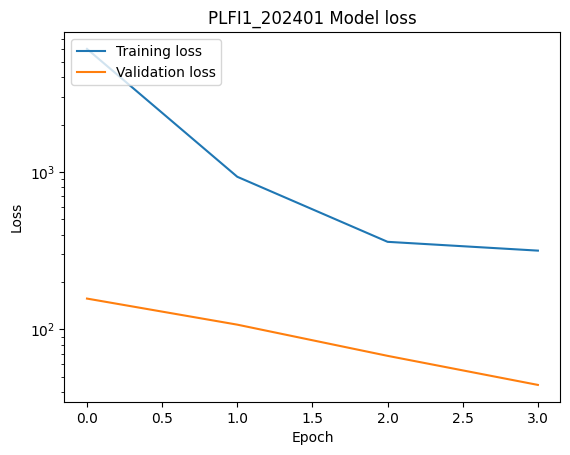

Fitted Weights Hash: 9ff4e7a89857320c761ae062fca9c842
Predicting Training through Test
All X hash: c171c27845921e92c134e8386fc2d327
Predicting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predictions Hash: 0fc902d06ee8cb5d10afe723d677100d


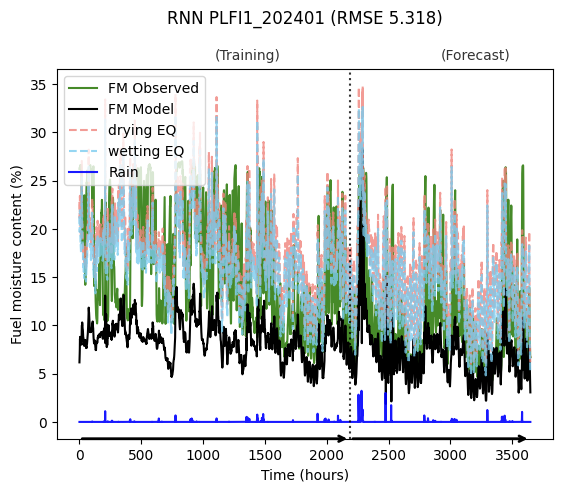

In [10]:
m, errs = rnn.run_model(rnn_dat)

In [ ]:
# rnn.fit(rnn_dat.X_train[0:150,:], rnn_dat.y_train[0:150,:])

In [ ]:
# rnn.model_train.get_weights()

## Test RNN

In [ ]:
import importlib
import utils
importlib.reload(utils)
from utils import read_pkl

In [ ]:
train = read_pkl("train.pkl")

In [ ]:
params = read_yml("params.yaml", subkey="rnn")
params = RNNParams(params)

In [ ]:
params.update({'activation': ['linear', 'linear'], 'epochs':300, 'val_frac': .2, 'scaler': 'minmax', 'rnn_layers': 1, 'dense_layers': 1})

In [ ]:
rnn_dat = RNNData(train['NV020_202401'], scaler = params['scaler'], features_list = params['features_list'])

In [ ]:
rnn_dat.train_test_split(
    train_frac = params['train_frac'],
    val_frac = params['val_frac']
)

In [ ]:
rnn_dat.scale_data()

In [ ]:
import importlib
import moisture_rnn
importlib.reload(moisture_rnn)
from moisture_rnn import RNN

In [ ]:
rnn = RNN(params)

In [ ]:
rnn.predict(rnn_dat.X_test)

In [ ]:
rnn.model_predict.summary()

In [ ]:
reproducibility.set_seed(123)
rnn = RNN(params)
m, errs = rnn.run_model(rnn_dat)

## Test Data Creation

In [ ]:
import importlib
import moisture_rnn_pkl
importlib.reload(moisture_rnn_pkl)
from moisture_rnn_pkl import pkl2train

In [ ]:
file_names=['test_CA_202401.pkl', 'test_NW_202401.pkl']
file_dir='data'
file_paths = [osp.join(file_dir,file_name) for file_name in file_names]

In [ ]:
train = pkl2train(file_paths)

In [ ]:
train.keys()

## Test RNN

In [ ]:
errs

In [ ]:
import importlib 
import moisture_rnn
importlib.reload(moisture_rnn)
from moisture_rnn import RNN

In [ ]:
params = read_yml("params.yaml", subkey="rnn")
params = RNNParams(params)

In [ ]:
reproducibility.set_seed()
rnn = RNN(params)
m, errs = rnn.run_model(rnn_dat)

## LSTM

TODO: FIX BELOW

In [ ]:
import importlib 
import moisture_rnn
importlib.reload(moisture_rnn)
from moisture_rnn import RNN_LSTM

In [ ]:
with open("params.yaml") as file:
    params = yaml.safe_load(file)["lstm"]
    
rnn_dat2 = create_rnn_data2(train[case],params)

In [ ]:
params.update({'epochs': 10})

In [ ]:
reproducibility.set_seed()
rnn = RNN(params)
m, errs = rnn.run_model(rnn_dat2)

In [ ]:
import importlib
importlib.reload(moisture_rnn)
from moisture_rnn import RNN_LSTM

In [ ]:
with open("params.yaml") as file:
    params = yaml.safe_load(file)["lstm"]

rnn_dat2 = create_rnn_data2(train[case],params)
params

In [ ]:
params.update({
    'learning_rate': 0.000001,
    'epochs': 10,
    'clipvalue':1.0
})

In [ ]:
reproducibility.set_seed()
lstm = RNN_LSTM(params)
m, errs = lstm.run_model(rnn_dat2)